# Yksi perustuloetuus
Antti Tanskanen,
11.5.2022

Tässä työkirjassa käytetään fin_benefits-kirjastosta muokattua versiota, jossa on toteutettu erilaisia yksiperusetuus-malli. Tavoitteena on arvioida yhden perusetuuden vaikutusta työnteon kannusteisiin.

## Python-kirjasto

Perustulo on toteutettu Python-kirjastossa fin_benefit.

In [1]:
# for Colab, install fin_benefits from Github
#!pip install git+https://github.com/ajtanskanen/benefits.git

In [2]:
# haetaan tarpeelliset kirjastot
import fin_benefits # määrittelee luokan, jossa on sosiaaliturvafunktiot yms
import numpy as np 

# kuvat suuremmiksi
import matplotlib.pyplot as plt


/Users/anttitanskanen/opt/miniconda3/envs/py37/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [3]:
plt.rcParams['figure.figsize'] = [10, 5]

## Nykytila

Laskee työllisyysveroaste, työnteon efektiivisen marginaalivero ja käteen jäävä ansio kirjaston avulla. Valitaan ensin tyyppitapaus. Muuttuja p kertoo tarkat tiedot laskennankohteesta, selite sisältää kuvauksen siitä ja parametri tulosta kehottaa printtaamaan selite:en.

In [4]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=3,tulosta=True)

1 aikuinen, ei lapsia. Työtön (työmarkkinatuki), ei puolisoa


Tarkastetaan vielä, millaisia parametrejä p:hen on syötetty

Itse laskenta koostuu kahdesta rivistä koodia. Alustetaan objektia ben kirjastosta fin_benefits. Tämän jälkeen sitä voi kutsua laskemaan marginaalit ja plottamaan ne.

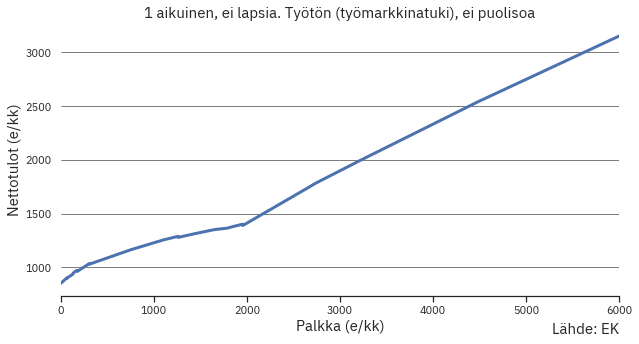

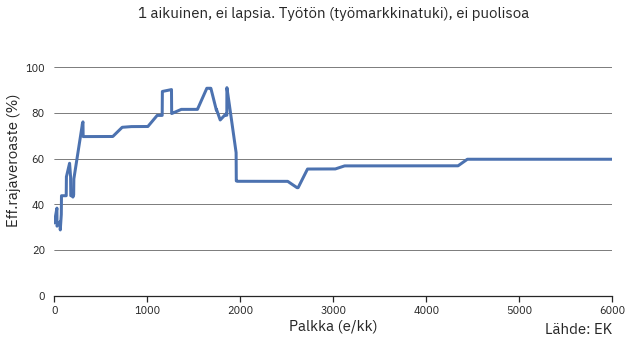

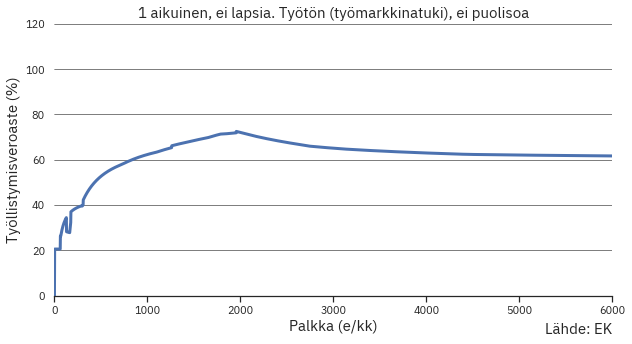

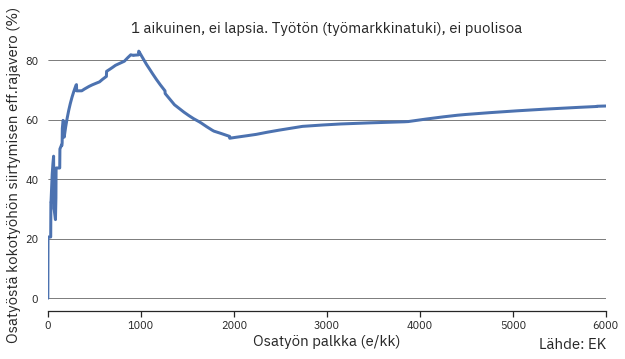

In [5]:
# Luokka Benefits() sisältää koodin
year=2022
baseline_ben=fin_benefits.Benefits()
baseline_ben.set_year(year)
marg=fin_benefits.Marginals(baseline_ben,year=year)

# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva,baseosatva=marg.laske_ja_plottaa(p)

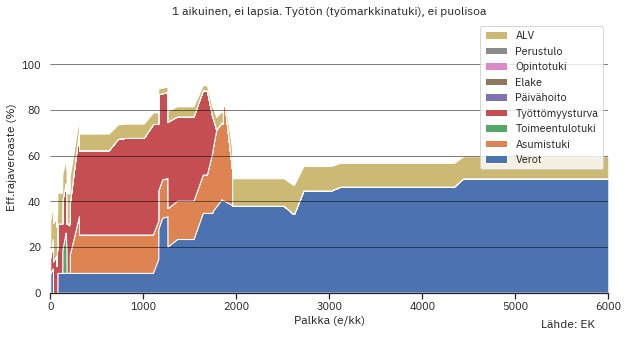

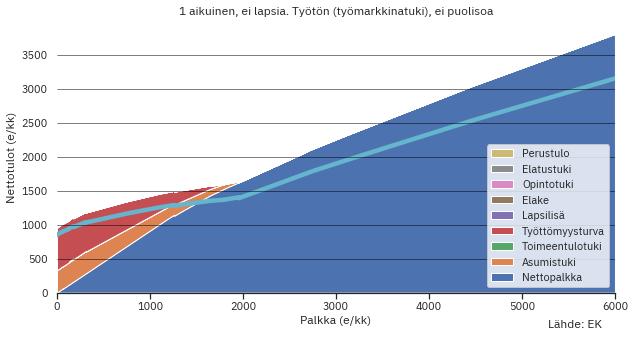

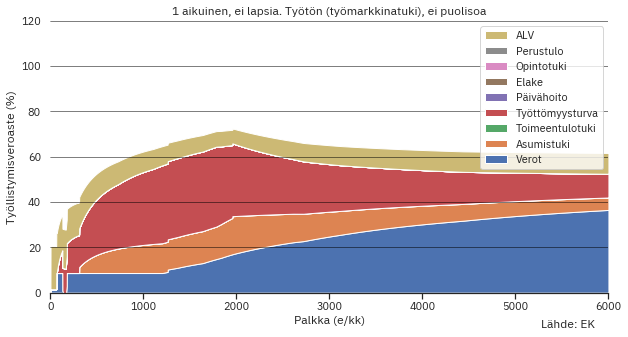

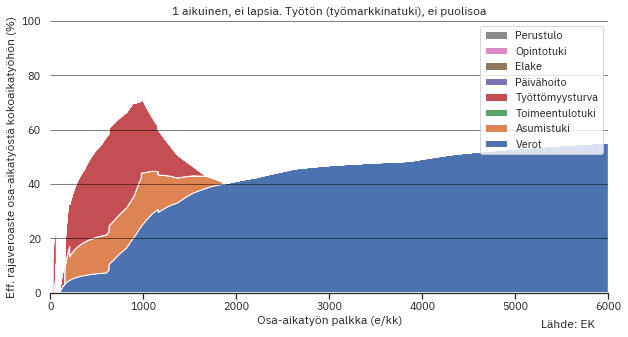

In [6]:
# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p,incl_perustulo=True)

## Single benefit

Single benefit scheme


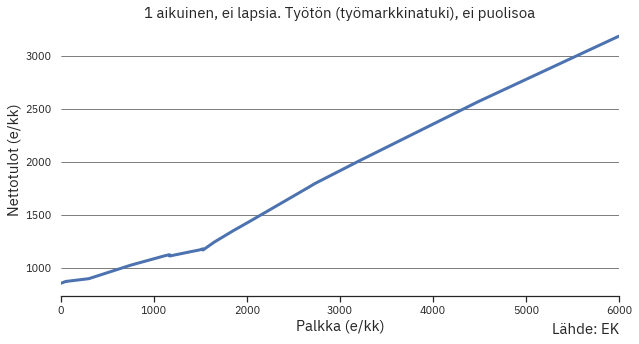

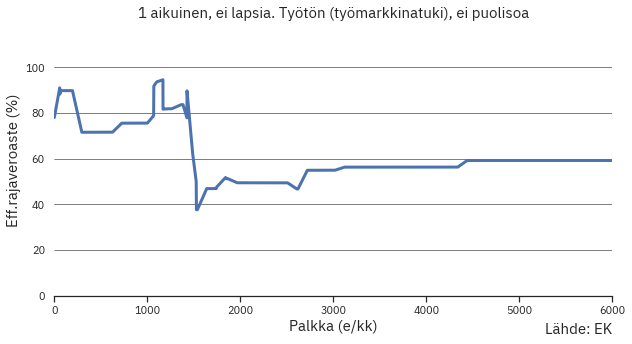

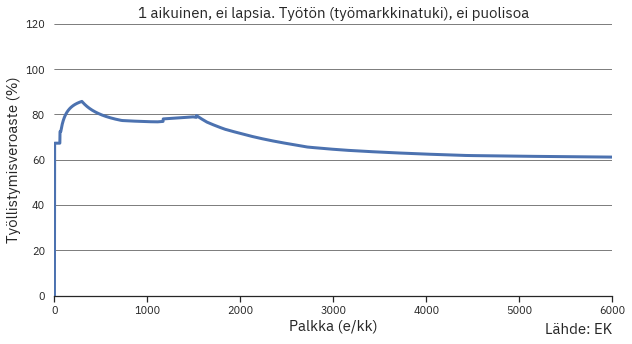

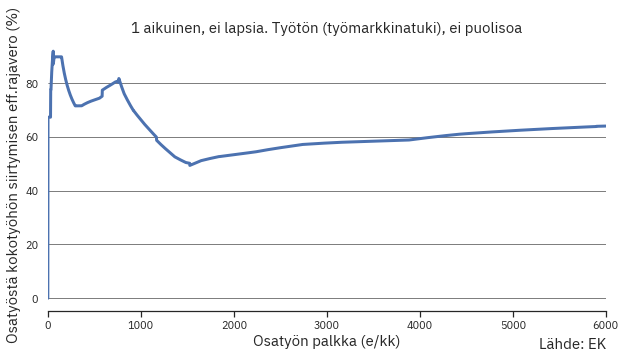

In [7]:
ben=fin_benefits.SingleBenefit()
ben.set_year(year)
basic_marg=fin_benefits.Marginals(ben,year=year)

# ja lasketaan & plotataan tulokset
bi_netto,bi_eff,bi_tva,bi_osatva=basic_marg.laske_ja_plottaa(p)

Jaotellaan vielä marginaalit niiden lähteiden mukaan. Nettopalkka sisältää kaikkien talouden aikuisten nettopalkat, kun taas vaaka-akselin Palkka tarkoittaa työllistyvän palkkaa.

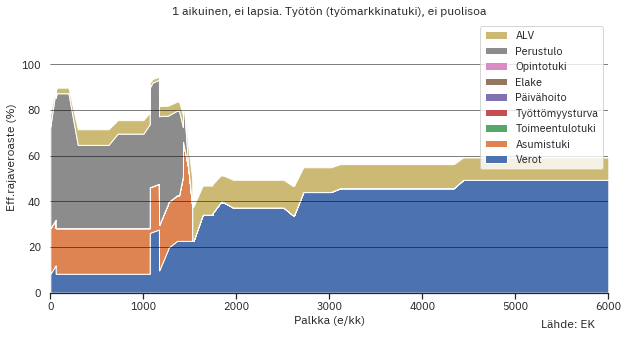

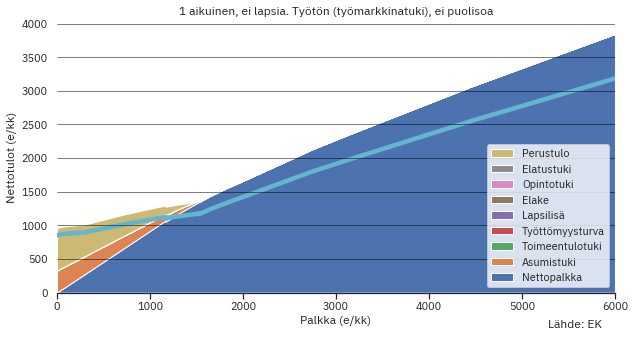

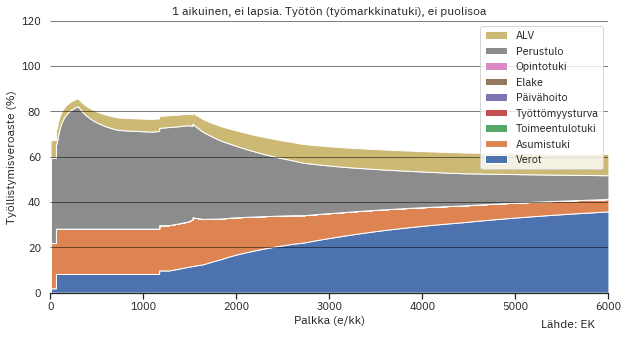

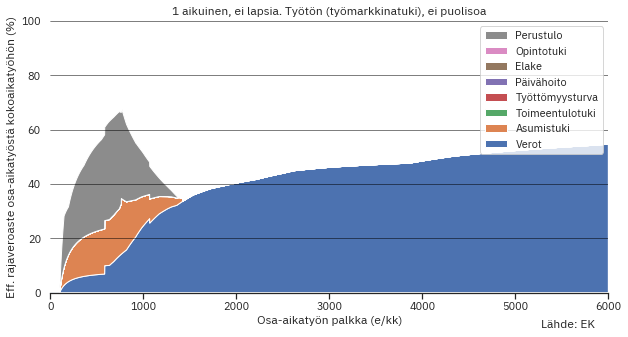

In [8]:
# ja lasketaan & plotataan tulokset
basic_marg.laske_ja_plottaa_marginaalit(p,incl_perustulo=True,incl_elake=False)

# Nykytilan ja perustulon vertailu
Verrataan käteen jäävää tuloa, efektiivistä veroastetta ja työllistymisveroastetta perustulomallissa nykytilaan.

In [9]:
p2=p.copy()
p2['t']=000

v1,b1=ben.laske_tulot_v2(p2,tt_alennus=0,include_takuuelake=True)
v2,b2=baseline_ben.laske_tulot_v2(p2,tt_alennus=0,include_takuuelake=True)

In [10]:
print('nimike','perustulo','nykytila','erotus')
for i in b2:
    print(f'{i:30} {b1[i]:.2f} {b2[i]:.2f} {b1[i]-b2[i]:.2f}')

nimike perustulo nykytila erotus
omat_multiplier                1.00 1.00 0.00
omat_perustulo                 742.00 0.00 742.00
omat_puhdas_tyoelake           0.00 0.00 0.00
omat_perustulo_netto           630.35 0.00 630.35
omat_perustulo_nettonetto      630.35 0.00 630.35
omat_palkkatulot               0.00 0.00 0.00
omat_tyoelake                  0.00 0.00 0.00
omat_kansanelake               0.00 0.00 0.00
omat_takuuelake                0.00 0.00 0.00
omat_palkkatulot_eielakkeella  0.00 0.00 0.00
omat_opintotuki                0.00 0.00 0.00
omat_elake_maksussa            0.00 0.00 0.00
omat_kokoelake                 0.00 0.00 0.00
omat_elake_tuleva              0.00 0.00 0.00
omat_ansiopvraha               0.00 741.75 -741.75
omat_puhdasansiopvraha         0.00 0.00 0.00
omat_peruspvraha               0.00 741.75 -741.75
omat_isyyspaivaraha            0.00 0.00 0.00
omat_aitiyspaivaraha           0.00 0.00 0.00
omat_kotihoidontuki            0.00 0.00 0.00
omat_sairauspaivaraha    

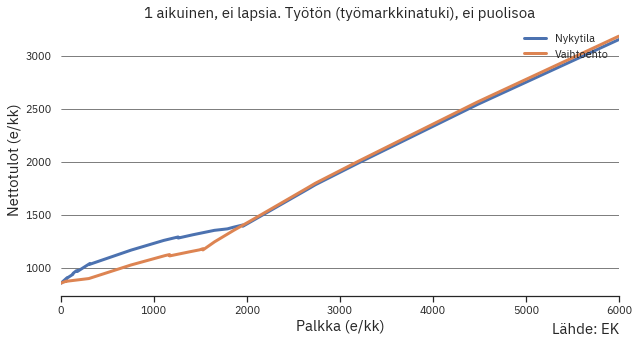

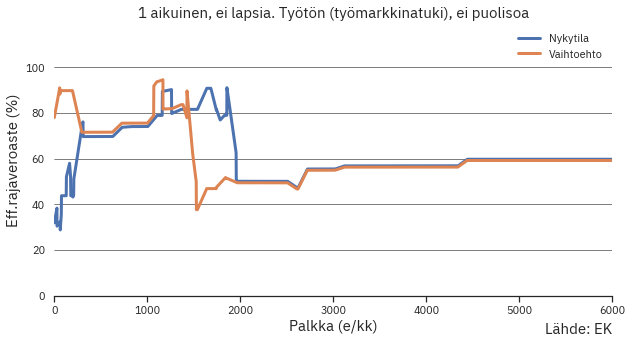

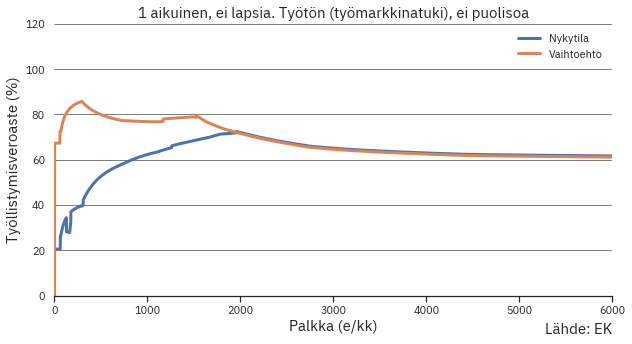

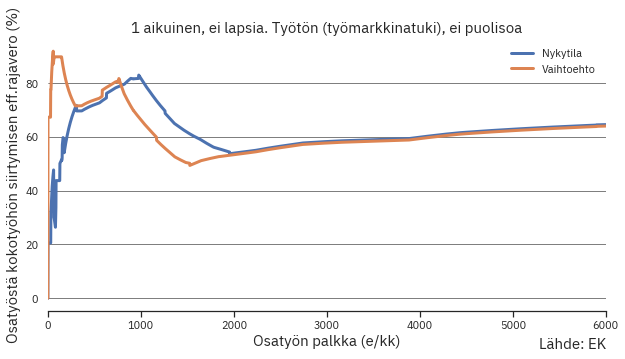

In [11]:
# ja lasketaan & plotataan tulokset
_,_,_,_=basic_marg.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,
                             basetva=basetva,baseosatva=baseosatva,figname='perustulovertailu_')

# Kokoelma esimerkkitapauksia

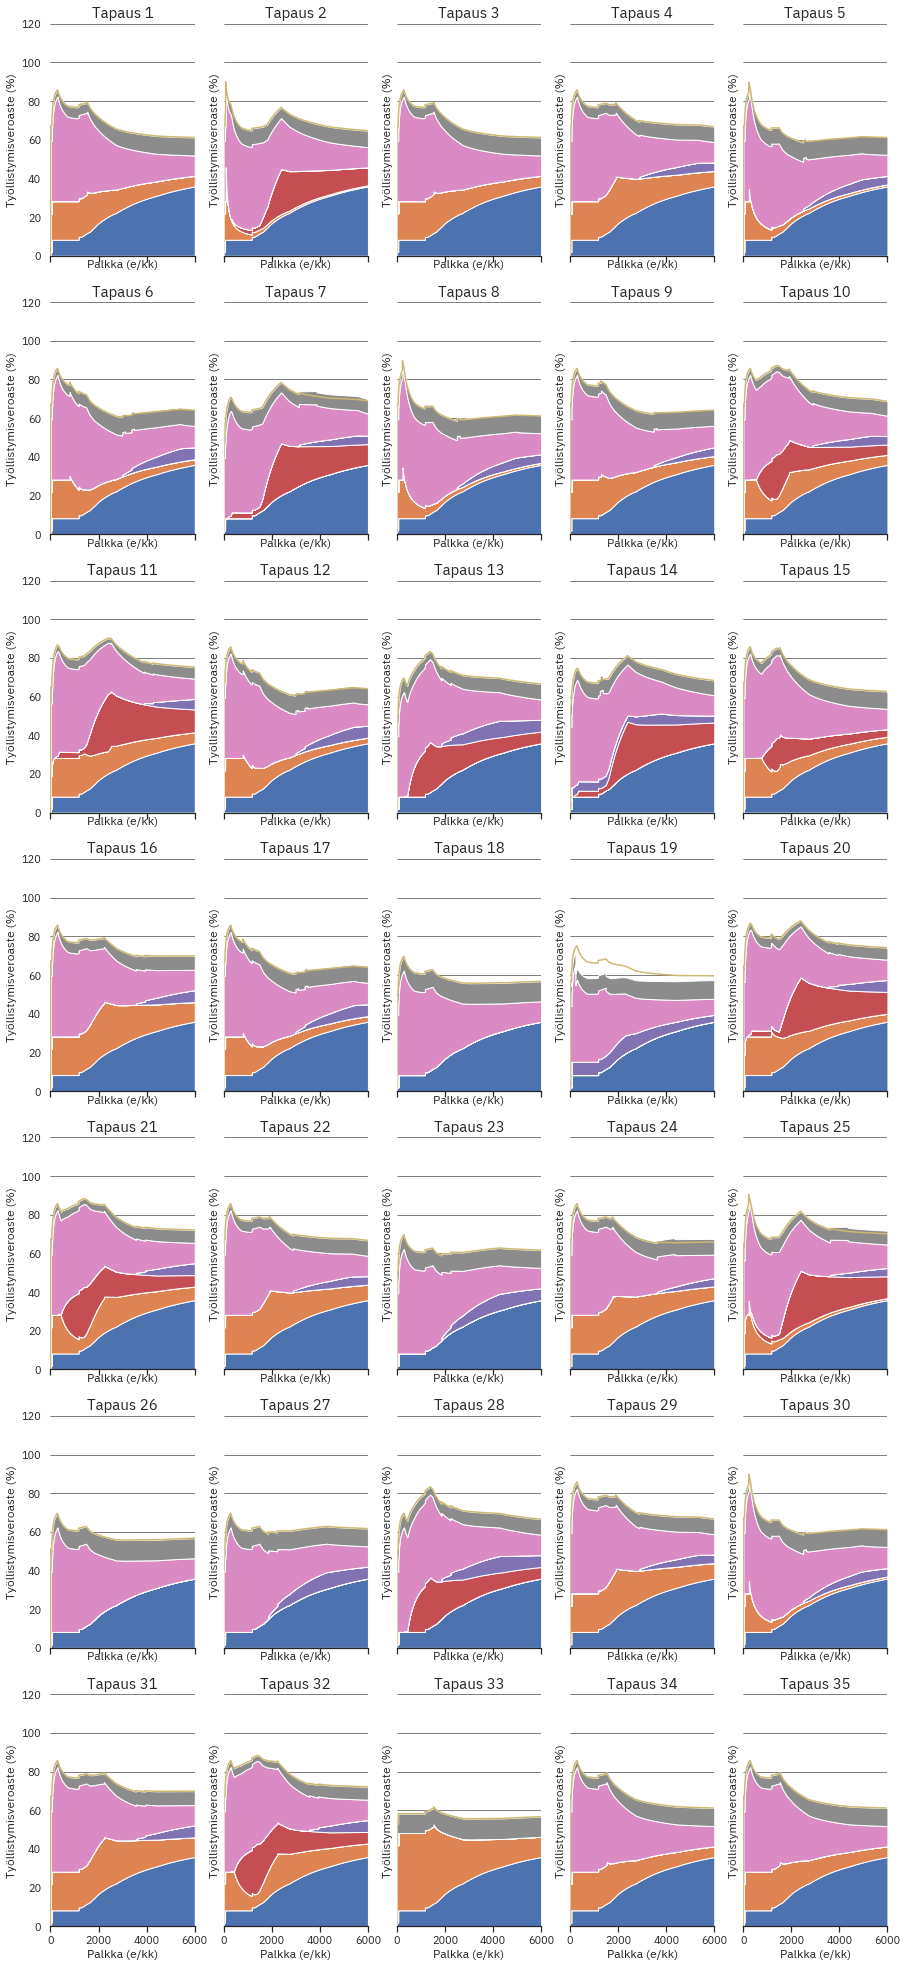

In [12]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [15, 35]
basic_marg.laske_ja_plottaa_hila(type='tva',include_perustulo=True)
plt.rcParams['figure.figsize'] = [10, 5]

# Kirjallisuus

[1] Viitamäki, H. Työnteon kannustimet - mitä jää käteen? VATT muistiot 50, https://vatt.fi/documents/2956369/3012213/muistio_50.pdf, 2015

[2] Kärkkäinen, O., Tervola, J. Talouspolitiikan vaikutukset tuloeroihin ja työllisyyteen 2015–2018, Valtioneuvoston selvitys- ja tutkimustoiminnan julkaisusarja 59/2018, http://julkaisut.valtioneuvosto.fi/handle/10024/161061, 2018